# Global Terrorism

As a security/defense analyst, try to find out the hot zone of terrorism.

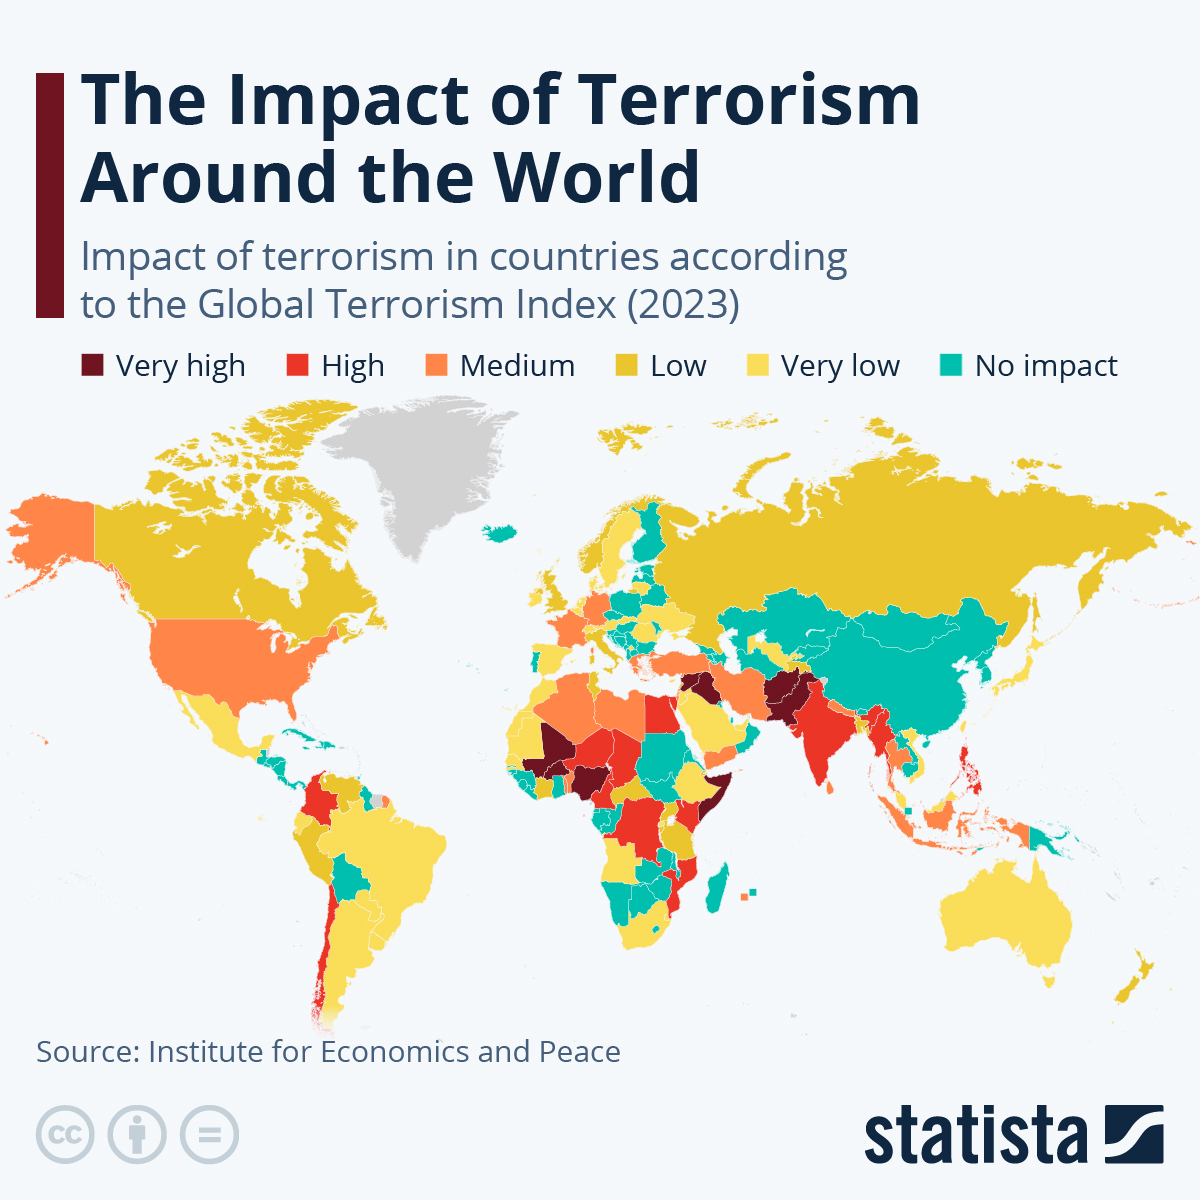

In [42]:
#load the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#display all columns
pd.set_option('display.max_columns',200)
#display all rows
pd.options.display.max_rows=None

In [45]:
#read the csv file...
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

In [46]:
#print the frist 5 row
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive

In [47]:
#check the dataset shape
df.shape

(171056, 135)

In [48]:
#check the dtype of dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171056 entries, 0 to 171055
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [49]:
#check the describe function
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.710560e+05,171056.000000,171056.000000,171056.000000,171056.000000,171056.000000,171056.000000,166546.000000,1.665450e+05,171050.000000,171056.000000,171056.000000,171056.000000,171056.000000,171055.000000,26801.000000,171055.000000,171056.000000,171056.000000,171056.000000,5662.000000,383.000000,171056.000000,161744.000000,169647.000000,10093.000000,9641.000000,9781.000000,1049.000000,975.000000,1021.000000,170676.000000,1718.000000,270.000000,171056.000000,99941.000000,101567.000000,104936.000000,16517.000000,1653.000000,542.000000,268.000000,121.000000,4765.000000,171056.000000,151565.000000,11890.000000,10524.000000,1680.000000,1526.000000,73.000000,70.000000,161345.000000,106613.000000,104390.000000,155684.000000,106359.000000,102300.000000,171055.000000,60711.000000,3.563500e+04,170877.000000,12570.000000,12515.000000,3729.000000,7456.000000,76379.000000,1.290000e+03,5.040000e+02,7.150000e+02,493.000000,9989.000000,9398.000000,171055.000000,171055.000000,171055.000000,171055.000000
mean,2.001812e+11,2001.746142,6.467630,15.457002,0.043869,132.471764,7.096536,23.402498,-4.911645e+02,1.451429,0.067843,0.988437,0.993014,0.879385,-0.568618,1.294205,0.134764,0.895631,0.034041,3.220887,3.665842,5.143603,8.403616,46.973644,127.721616,10.203012,55.102790,132.092015,9.908484,55.200000,138.929481,0.084077,0.264261,0.188889,0.002572,-64.011477,-1.608790,0.030247,7.001211,0.238355,7.219557,0.444030,7.033058,-6.408395,6.429421,11.085105,6.740791,10.683675,6.865476,11.495413,6.246575,10.842857,2.394298,0.050144,0.484271,3.210574,0.041689,0.097126,-0.508316,3.300028,2.281055e+05,0.059499,4.941289,-0.383060,-43.011196,-30.452924,-0.144136,3.304762e+06,6.462062e+05,7.749030e+05,269.146045,4.616478,-28.223239,-4.575049,-4.501751,0.091474,-3.967619
std,1.315779e+09,13.157652,3.396398,8.821531,0.204803,112.837542,2.949416,18.824729,2.111886e+05,1.004660,0.285755,0.106910,0.083290,0.325681,2.522002,0.692637,0.341472,0.305740,0.181336,1.892653,2.243197,2.261157,6.649533,31.078225,88.384755,5.734230,25.792411,126.298937,5.784885,26.620113,152.601727,0.277505,0.441067,0.392147,0.050652,227.222735,13.196721,1.137341,2.566953,1.026315,2.790555,0.497787,2.759631,4.169913,2.153367,6.510775,2.198094,7.553829,2.151166,8.377232,1.507212,8.192672,11.604191,5.958350,4.255813,36.888907,3.205060,1.445257,3.096521,0.490328,1.623864e+07,0.443382,209.521560,7.103122,84.921820,124.802143,1.199508,3.089914e+07,7.478593e+06,1.055264e+07,3111.067612,2.040433,65.506007,4.543323,4.631399,0.582530,4.691340
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.

In [50]:
#check the null values
df.isnull().sum()

,0
eventid,0
iyear,0
imonth,0
iday,0
approxdate,163481
extended,0
resolution,168836
country,0
country_txt,0
region,0


In [51]:
#check the duplicate values
df.duplicated().sum()

np.int64(0)

In [52]:
#select the feature
col= ["iyear","imonth",'iday','country_txt','city','region_txt','latitude','longitude','attacktype1_txt','success','suicide','target1','targtype1_txt','gname','motive','weaptype1_txt',"nkill",'nwound','summary']

In [53]:
new_df = df[col]
new_df.head()  #print the frist 5 rows

,iyear,imonth,iday,country_txt,city,region_txt,latitude,longitude,attacktype1_txt,success,suicide,target1,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,summary
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,Assassination,1,0,Julio Guzman,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,Mexico city,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),1,0,"Nadine Chaval, daughter",Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Unknown,Southeast Asia,15.478598,120.599741,Assassination,1,0,Employee,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Athens,Western Europe,37.997490,23.762728,Bombing/Explosion,1,0,U.S. Embassy,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,1,0,U.S. Consulate,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [54]:
#check the new dataframe shape
new_df.shape

(171056, 19)

In [55]:
#rename the columns
new_df = new_df.rename(columns={'iyear':"year",'imonth':'month','iday':'day','country_txt':'country_name','region_txt':'region_name','attacktype1_txt':'attack_type','target1':'target','targtype1_txt':'traget_type','gname':'group_name','weaptype1_txt':'weapan_type','nkill':'number_of_kills','nwound':'wouned'})

In [56]:
new_df.head()

,year,month,day,country_name,city,region_name,latitude,longitude,attack_type,success,suicide,target,traget_type,group_name,motive,weapan_type,number_of_kills,wouned,summary
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,Assassination,1,0,Julio Guzman,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,Mexico city,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),1,0,"Nadine Chaval, daughter",Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Unknown,Southeast Asia,15.478598,120.599741,Assassination,1,0,Employee,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Athens,Western Europe,37.997490,23.762728,Bombing/Explosion,1,0,U.S. Embassy,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,1,0,U.S. Consulate,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [57]:
#check the null value in the new dataframe
new_df.isnull().sum()

,0
year,0
month,0
day,0
country_name,0
city,435
region_name,0
latitude,4510
longitude,4511
attack_type,0
success,0


In [58]:
#check the duplicat values
new_df.duplicated().sum()

np.int64(9186)

In [59]:
#drop the duplicate values
new_df.drop_duplicates(keep='first', inplace=True)

In [60]:
new_df.isnull().sum()

,0
year,0
month,0
day,0
country_name,0
city,435
region_name,0
latitude,3971
longitude,3972
attack_type,0
success,0


In [61]:
#add columns casualities
new_df["casualities"] = new_df.number_of_kills+new_df.wouned

## Number Of Terrorist Activities Each Year

Text(0.5, 1.0, 'Number of acctive terrorist at each years')

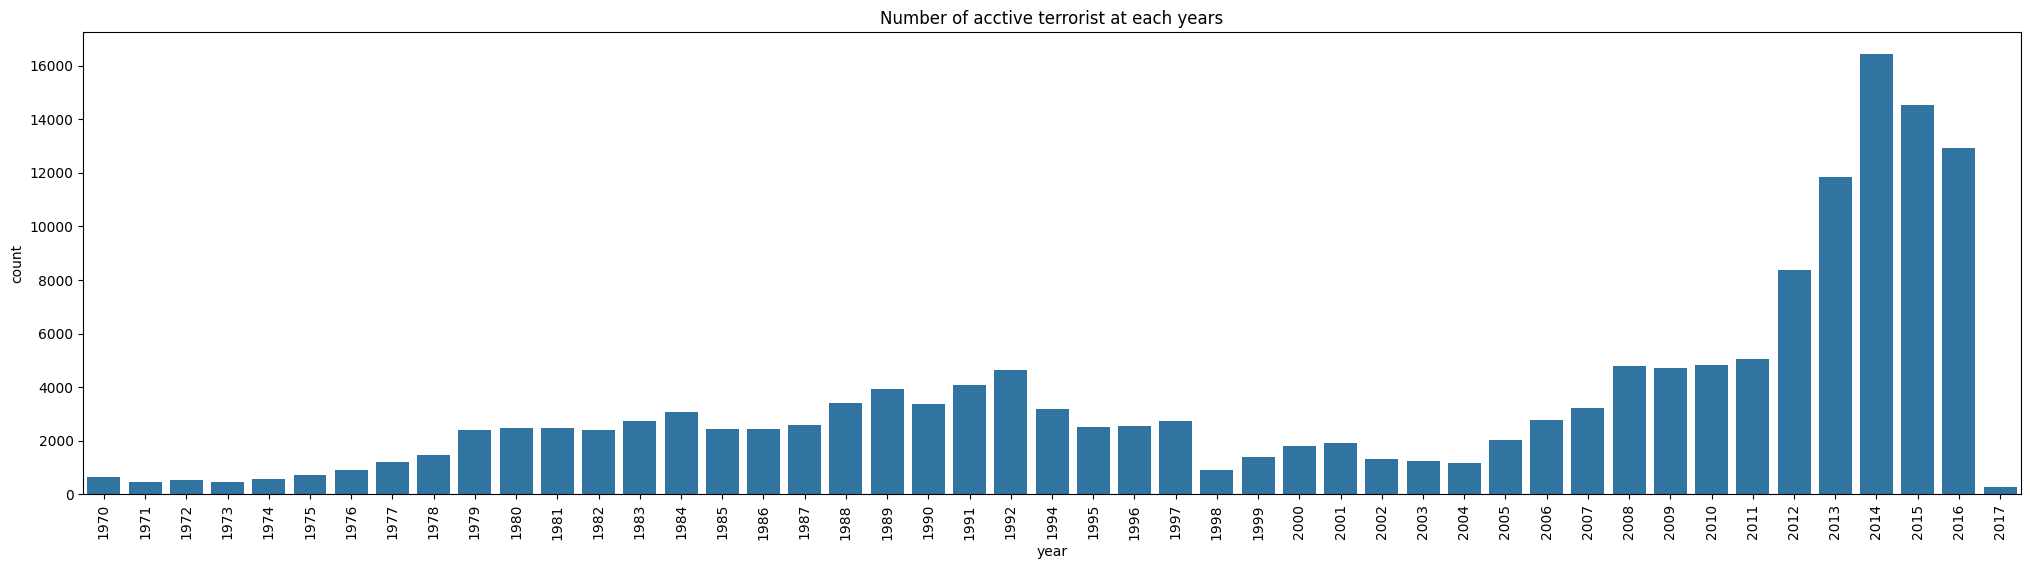

In [62]:
#year wise terrorist attactes
plt.subplots(figsize=(25,6))
sns.countplot(x='year', data=new_df )
plt.xticks(rotation=90)
plt.title("Number of acctive terrorist at each years")

## Terrorist Activities by Region in each Year

Text(0.5, 0, 'Years')

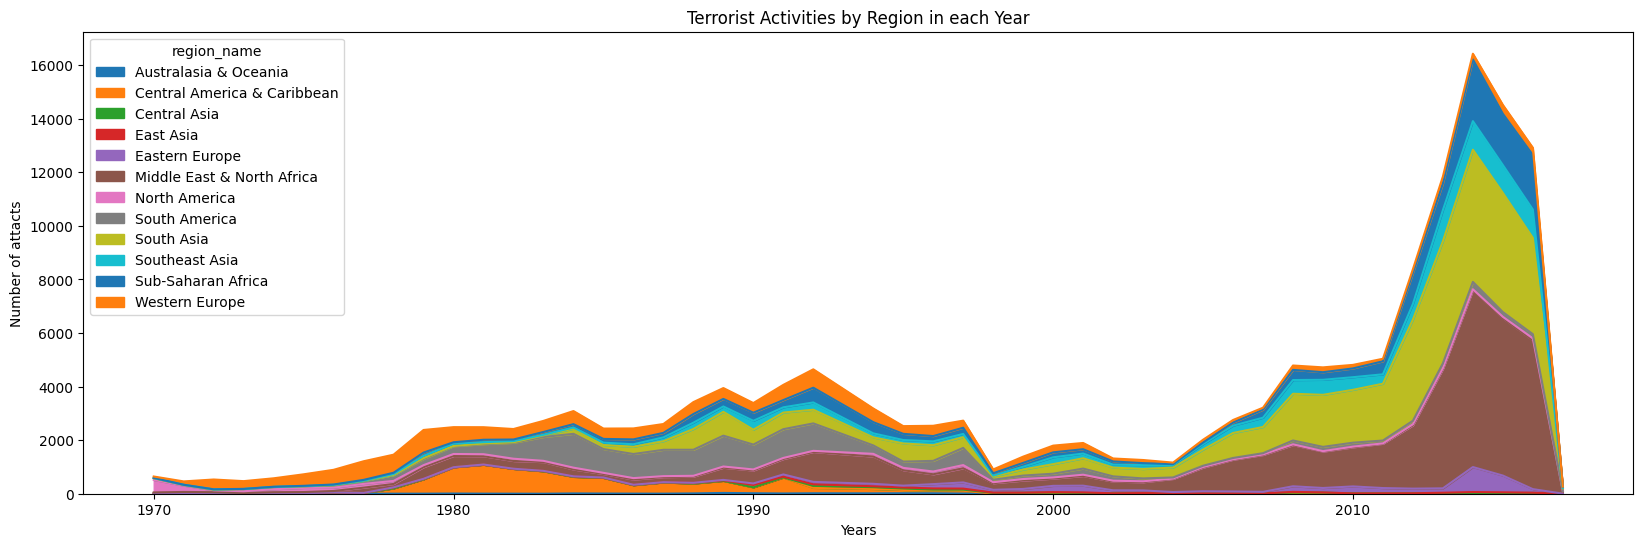

In [63]:
#terrorist active region
pd.crosstab(new_df.year, new_df.region_name).plot(kind="area",figsize=(20,6))
plt.title("Terrorist Activities by Region in each Year")
plt.ylabel("Number of attacts")
plt.xlabel("Years")

In [64]:
r_type = new_df.region_name.value_counts().to_frame().reset_index()
r_type.columns = ['region_name','count']

Text(0.5, 0, 'Number of attacks')

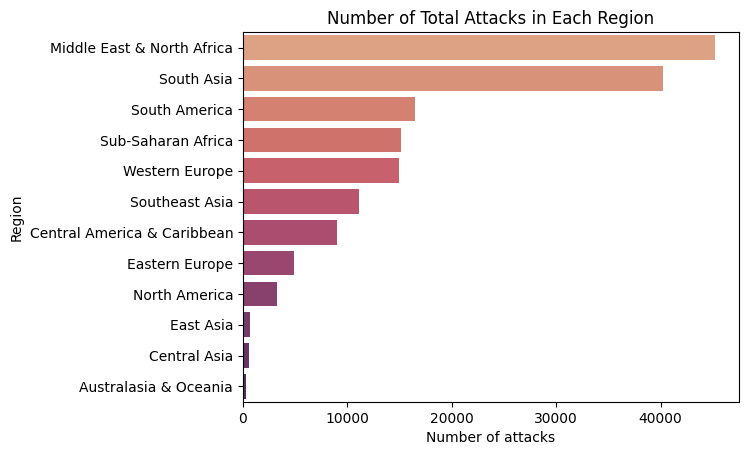

In [65]:
sns.barplot(y='region_name', x='count',data=r_type,orient='h',palette='flare')
plt.title("Number of Total Attacks in Each Region")
plt.ylabel('Region')
plt.xlabel('Number of attacks')

we can notice from the previous figure that (Middle East & North Africa) and (south Asia) have huge increase in last 10 years.

## Number of total attacks of each country

In [66]:
top_10_country = new_df.country_name.value_counts()[:10].to_frame().reset_index()
top_10_country.columns = ["country_name",'count']
top_10_country

,country_name,count
0,Iraq,21218
1,Pakistan,13119
2,Afghanistan,11166
3,India,10640
4,Colombia,7397
5,Philippines,6092
6,Peru,5044
7,United Kingdom,4880
8,El Salvador,4302
9,Turkey,3918


Text(0, 0.5, 'Count')

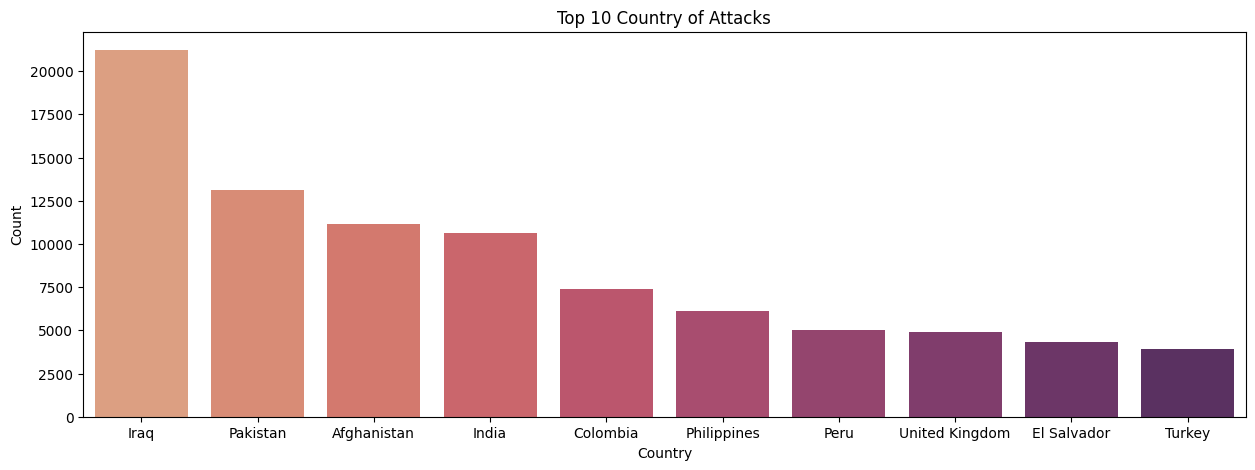

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(data = top_10_country,x ='country_name',y='count',palette = 'flare')
plt.title("Top 10 Country of Attacks")
plt.xlabel("Country")
plt.ylabel("Count")

**we can notice that the first three affected countries by terrorism are from Middle East**

## Target Methods by Terrorists

In [68]:
t_type = new_df.traget_type.value_counts()[:10].to_frame().reset_index()
t_type.columns = ["target_type",'count']

Text(0, 0.5, 'count')

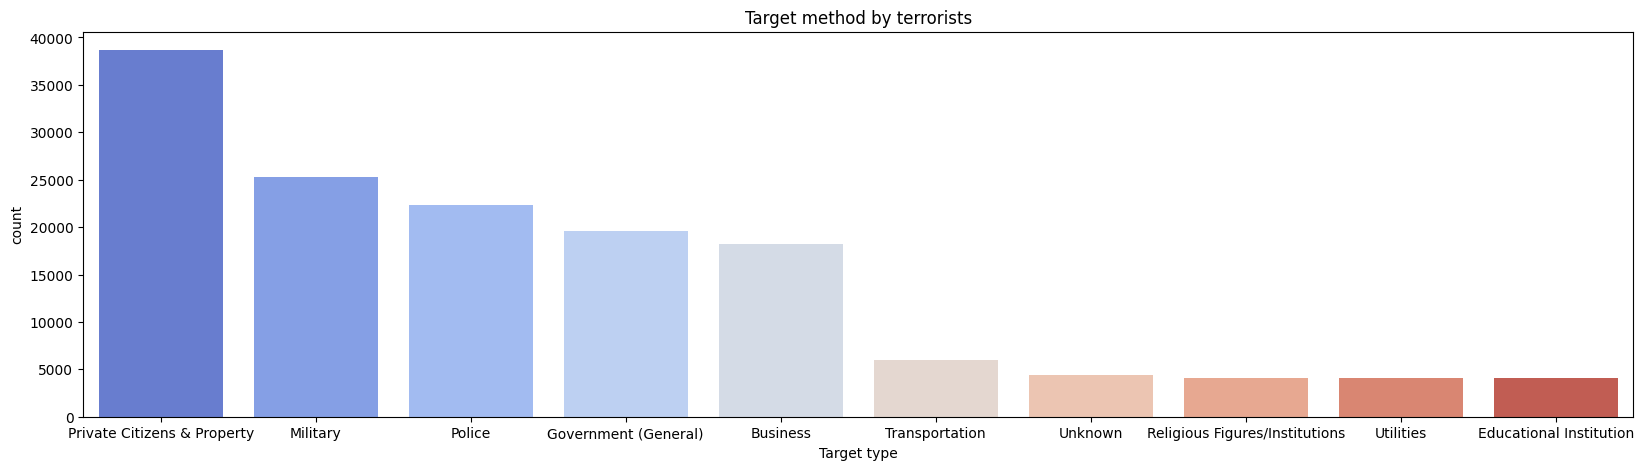

In [69]:
plt.figure(figsize=(20,5))
sns.barplot(x='target_type',y='count',data=t_type,palette = 'coolwarm')
plt.title("Target method by terrorists")
plt.xlabel("Target type")
plt.ylabel('count')

## Weapan  used by Terrorist

In [70]:
w_type = new_df.weapan_type.value_counts().to_frame().reset_index()
w_type.columns = ['weapan_type','count']

Text(0, 0.5, 'count')

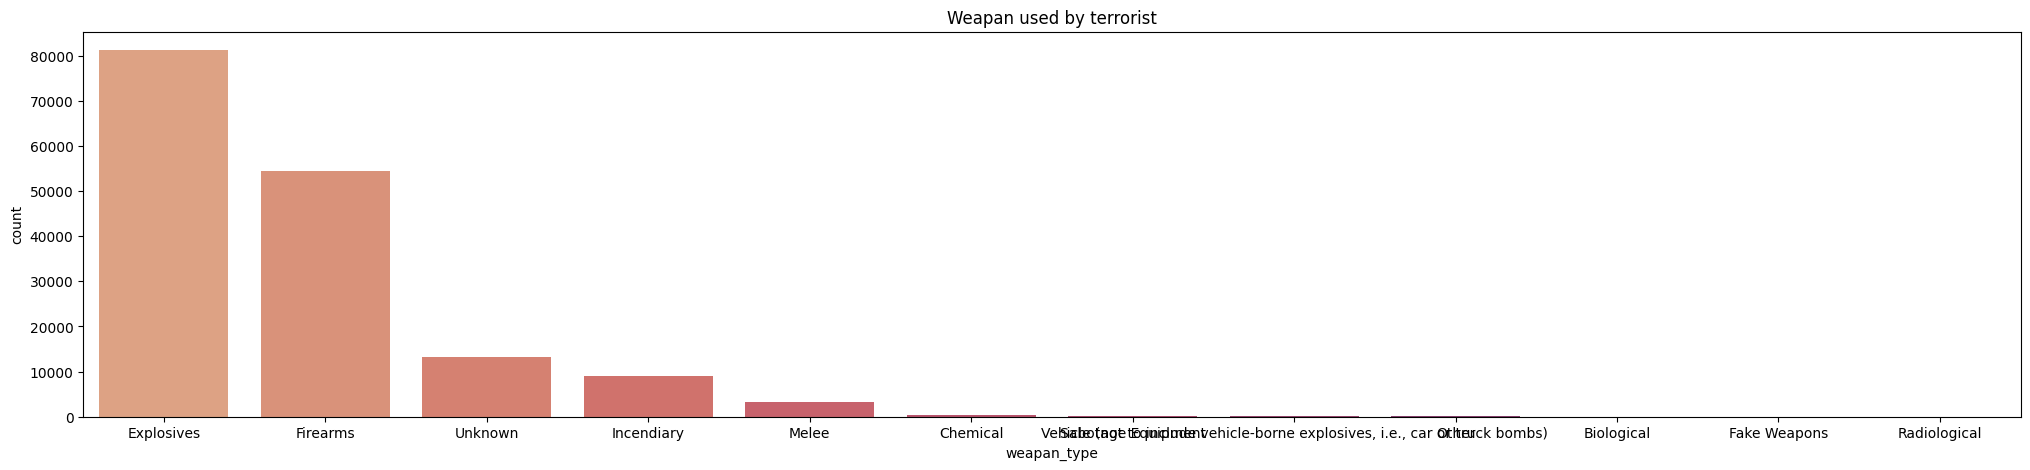

In [71]:
plt.figure(figsize=(25,5))
sns.barplot(x='weapan_type',y='count',data=w_type,palette='flare')
plt.title('Weapan used by terrorist')
plt.xlabel("weapan_type")
plt.ylabel('count')

In [72]:
g_type = new_df.group_name.value_counts()[:5].to_frame().reset_index()
g_type.columns = ['group_name','count']

Text(0, 0.5, 'count')

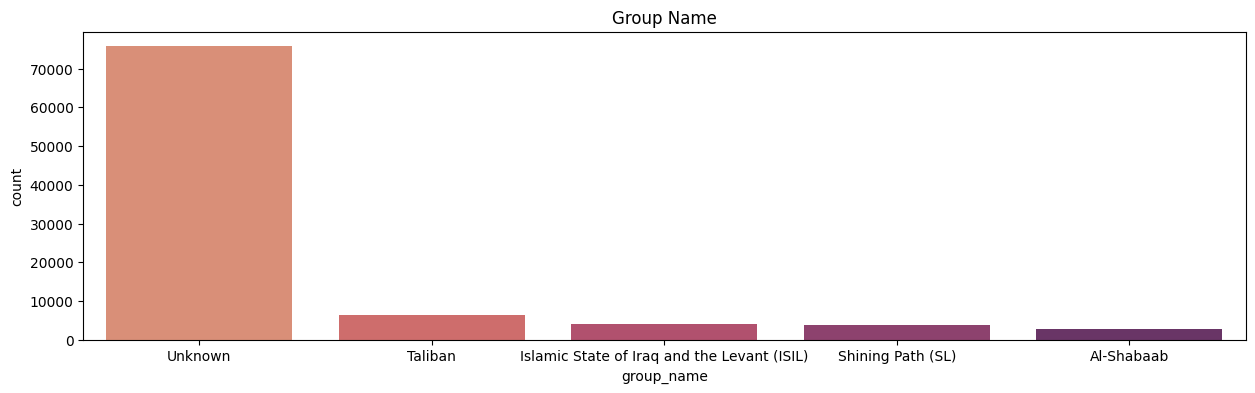

In [73]:
plt.figure(figsize=(15,4))
sns.barplot(x='group_name', y='count', data=g_type, palette='flare')
plt.title('Group Name')
plt.xlabel("group_name")
plt.ylabel('count')

**we can notice most dangerous and active group is taliban**

## Number of Total Casualities in Each Country

In [74]:
top10_c = new_df.groupby('country_name').casualities.sum().to_frame().reset_index().sort_values('casualities',ascending = False)[:10]
top10_c

,country_name,casualities
84,Iraq,192093.0
0,Afghanistan,68612.0
134,Pakistan,60827.0
80,India,45285.0
167,Sri Lanka,29422.0
189,United States,23451.0
35,Colombia,22950.0
140,Philippines,21056.0
130,Nigeria,19268.0
2,Algeria,19086.0


Text(0, 0.5, 'country_name')

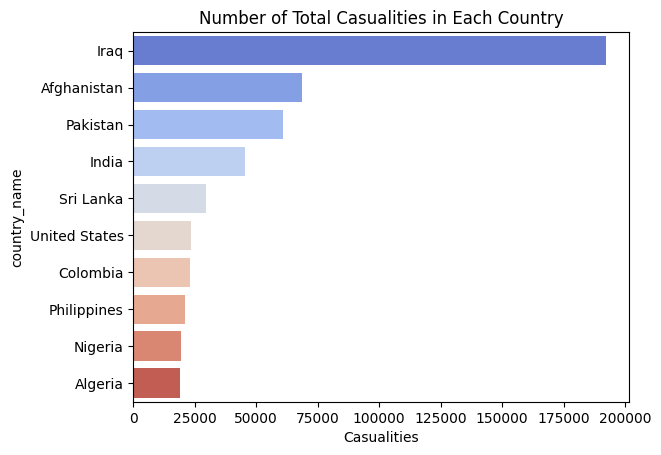

In [75]:
sns.barplot(x='casualities',y='country_name',data=top10_c, orient='h',palette="coolwarm")
plt.title("Number of Total Casualities in Each Country")
plt.xlabel("Casualities")
plt.ylabel("country_name")

**we can notice from the figure that Iraq has has the highest number of casulities people.**